<a href="https://colab.research.google.com/github/phon1e/pytorch_practice/blob/main/pytorch_ztm01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyTorch Workflow

Let's explore a an example pytorch end-to-end workflow 



In [ ]:
what_were_covering = {1: "data (prepare and load}",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictinos and ecaluting a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering

{1: 'data (prepare and load}',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictinos and ecaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [ ]:
import torch
from torch import nn # nn contains all of building blocks of nueral network
import matplotlib.pyplot as plt

#check ver
torch.__version__


'1.13.1+cu116'

## 1. Data (preparing and loading )

Data can be almost anyting.. in ml

* Excel speadsheet
* img
* vdo
* audio
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Buil a model to learn patterns in that numerical representation.


In [ ]:
# Create knonw param using linear regression 

weight = 0.7
bias = 0.3 

#Create 
start =0
end = 1 
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training  and test sets (one of the most important concepts in ml in general)

In [ ]:
#Create a train/test split

train_split = int(0.8 * len(X))
train_split

40

In [ ]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0

How might we better visualize our data?

This is where the data exploere's motto come in ! 



In [ ]:
def plot_predictions(train_data= X_train, 
                     train_labels= y_train, 
                     test_data = X_test, 
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10, 7))
  
  #Plot training data in blue 
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data ")

  #green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data ")

  #plot if exist
  if predictions is not None:
    plt.scatter(test_data, predictions, c = "r", s=4, label="Predictions")

  #Show legend
  plt.legend(prop={"size": 14});



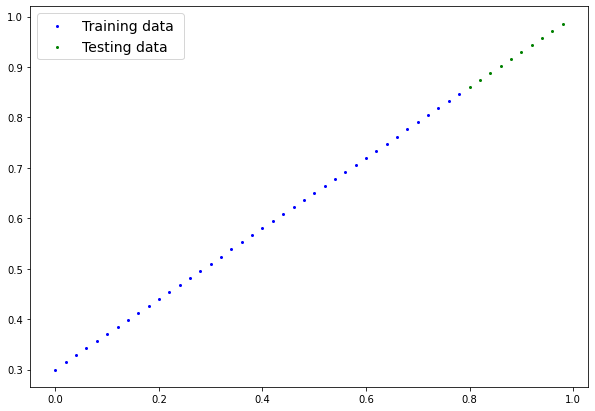

In [ ]:
plot_predictions()

## 2. Building model

Our 1st model let's goooo

linear reg: Y = a + bX

resources : https://realpython.com/python3-object-oriented-programming/

Two main algo:

1. Gradient decent : https://youtu.be/IHZwWFHWa-w
2. Backpropagation : https://www.youtube.com/watch?v=Ilg3gGewQ5U


In [ ]:
#Create linear regression model class
from torch import nn

class LinearRegressionModel(nn.Module): # almost everyting in pytorch in nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, #< start with rand w and try to adjust to ideal w
                                            requires_grad= True,# param update via gradient descent
                                            dtype = torch.float)) # default float32
    self.bias = nn.Parameter(torch.randn(1, #rand bias and try to adjust to ideal bias
                                         requires_grad = True,
                                         dtype = torch.float))
    
  #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is input
    return self.weights * x + self.bias #linear regres formular 

In [ ]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

### PyTorch model buiding essentials

* torch.nn - cnotains all of the buildings for computtational graphs
* torch.nn.Parameter - what param should out model try and learn, often will set these for us
* torch.nn.Module - The base class for all nn modules, if you subclass it, should overwrite forward()
* torch.optim - this where the optimizers in pytorch live, it will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defubes what happend in forward() computation.

cheat sheet :https://pytorch.org/tutorials/beginner/ptcheat.html


### Checking the contents of model

Now we've create a model let's check what's inside...

So we can check out param using `.parameters()`

In [ ]:
#Create rand seed 

torch.manual_seed(42)

#Create an instance of the model (sub class of nn.Module)
model_0 = LinearRegressionModel()

model_0

#heck param

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named params 
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weight, bias

(0.7, 0.3)

### Make pred using `torch.inference_mode()`

To check model predictive power, let's see how well it predicts `y_test` based on `X_test`

run throgh `foward()` method 

In [ ]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [ ]:
#Make pred with model

with torch.inference_mode(): # inference_mode : turn off gradient tracking 
  y_preds = model_0(X_test)

# with torch.no_grad(): # torch.no_grad() similar to torch.inference_mode()
#   y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

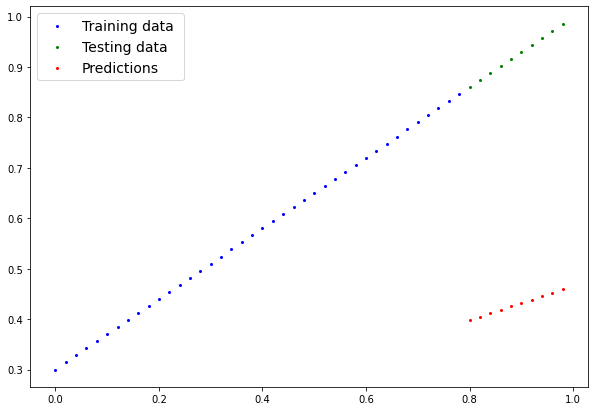

In [ ]:
plot_predictions(predictions = y_preds)

##Train model

The whole idea of training is for a model to move from some unknow param to some known param 

Or in other words from a poor representation of the data to a better reresentation of the data.

One way to measure how poor or wrong is to use a loss funciton 

*Note: Loss function may also be called cost function or criterion in defferent areas. For our case, we're going to refer to it as a loss funciton.

* **Loss funciton:** A function measure how wrong model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's param(eg. weight, bias)

And specifically for PyTorch we need:
* trainig loop
* testing loop

Loss func: https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html 

`MAE_loss = torch.nn.L1Loss` 

or


`MAE_loss = torch.mean(torch.abs(y_pred-y_test))`

OPTIMIZER `torch.optim`
* https://pytorch.org/docs/stable/optim.html?highlight=optimizer#torch.optim.Optimizer


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
# Setup a loss func
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr =0.01, #learning rate  
                            )

In [ ]:
loss_fn

L1Loss()

### Buildng a training loop in torch(and testing loop)

A couple things we need in a training loop:
0. loop through the data
1. forward pass (this involves data moving through model's `forward()` to make prediction on data  - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3.Optimizer zero grad
4. Loass backward - move backwards through network to calculate the gradients of each of the param of model with respect to the loss
5. Optimizer step - use the optimizer to adjust model's paran to tryt and improve loss 


In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)
#An epoch is one loop through the data (this is hyperparams)
epochs = 200

#Track diff value 
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data 
for epoch in range(epochs):
  #Set the model to training mode
  model_0.train() # set all params that require grad to require grad
  # 1. forward pass
  y_pred = model_0(X_train)

  # 2. cal the loss 
  loss = loss_fn(y_pred, y_train) # call diff : output = loss(input, target)
  # print(f"loss: {loss}")


  # 3. optimizer grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the params of the model
  loss.backward()

  # 5. steps the optimizer (perform gradient descent )
  optimizer.step() # by default how the optimizer changes will acculumate through the loop

  model_0.eval() # turn off grad tracking 
  with torch.inference_mode(): #turns off grad tracking === `with torch.no_grad()`
    #1. Do the foward pass 
    test_pred = model_0(X_test)

    #2 cal loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)

    print(f"Epoch: {epoch} | loss: {test_loss} | test loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | loss: 0.48106518387794495 | test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 20 | loss: 0.21729660034179688 | test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 40 | loss: 0.11360953003168106 | test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 60 | loss: 0.08886633068323135 | test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch: 80 | loss: 0.07232122868299484 | test loss: 0.07232122868299484
OrderedDict([('weights', tensor([0.5459])), ('bias', tensor([0.3648]))])
Epoch: 100 | loss: 0.05646304413676262 | test loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch: 120 | loss: 0.04060482233762741 | test loss: 0.04060482233762741
OrderedDict([('weights', tensor([0.6141])), ('bias', tensor([0.3

In [ ]:
#loss: 0.06473556160926819
#

In [ ]:
loss_values[:1], test_loss_values[:1]

([tensor(0.3129, grad_fn=<MeanBackward0>)], [tensor(0.4811)])

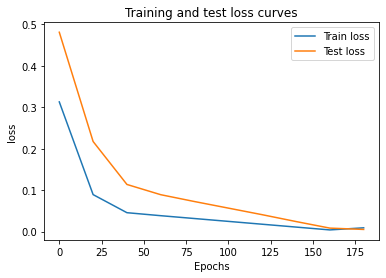

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.title("Training and test loss curves")
plt.legend()

In [ ]:
print(loss)

tensor(0.0026, grad_fn=<MeanBackward0>)


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

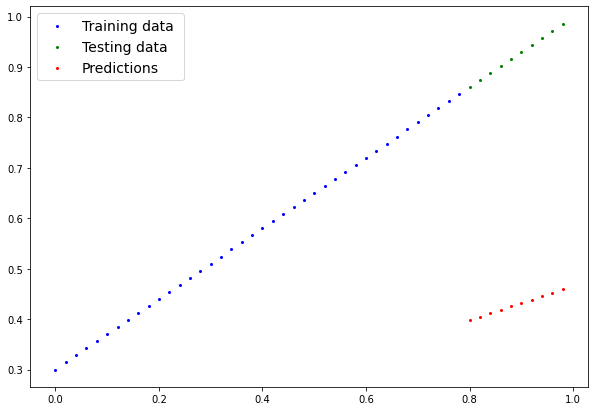

In [ ]:
plot_predictions(predictions=y_preds)

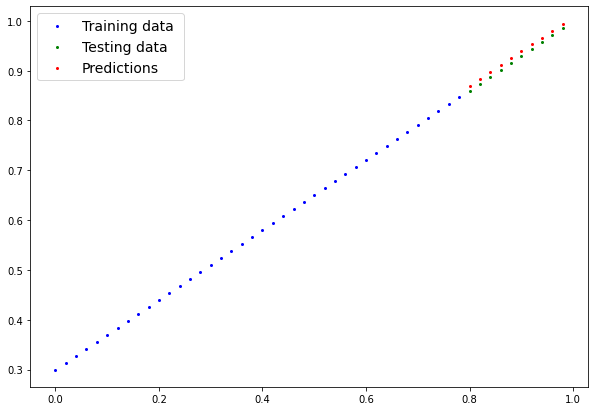

In [ ]:
plot_predictions(predictions = y_pred_new)

##Saving a model 
There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch obj pickle format ref:https://docs.python.org/3/library/pickle.html.
2. `torch.load()` - allows you to load model.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary.

ref:https://pytorch.org/tutorials/beginner/saving_loading_models.html


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# Saving model
from pathlib import Path

#1. create dir
MODEL_PATH = Path("models")

MODEL_PATH.mkdir(parents = True, exist_ok = True)

#2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth" # .pth/.pt == pytorchOpject
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

#3. save the model state_dict
print(f"Saving to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f= MODEL_SAVE_PATH)

Saving to: models/01_pytorch_workflow_model_0.pth


In [ ]:
model_0.eval()

LinearRegressionModel()

In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Feb  1 04:20 01_pytorch_workflow_model_0.pth


## Loading model

Since save moedl `state_dict()` rather the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#To load in a saved state_dict have to instantiate a new instance of model
loaded_model_0 = LinearRegressionModel()

#load the saved satate_dict of model_0(update new instance parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

#before loaded
#OrderedDict([('weights', tensor([0.5349])), ('bias', tensor([0.8094]))])

#after loaded

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
#Make some models preds
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#Make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
#compare
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

let's go back through the steps above and see it all in one place

In [ ]:
# Import 
import torch 
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'1.13.1+cu116'

Create device-agnostic code.

This means if got access to a GPU, code will use it

If no GPU is available, code will default to using GPU

In [ ]:
#Setup device

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


In [ ]:
!nvidia-smi

Wed Feb  1 04:20:47 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    28W /  70W |    570MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###6.1 data

In [ ]:
#Create some date using linear regress y = weight * X + bias
w = 0.7
b = 0.3

#Create rangle val

start = 0
end = 1
step = 0.02

#create x, y
X = torch.arange(start, end, step).unsqueeze(dim=1) # without insqueeze err will pop up
y = w*X +b

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split date
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

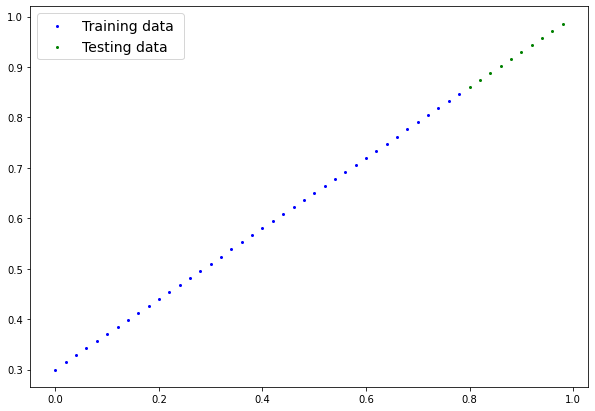

In [ ]:
plot_predictions(X_train, y_train, X_test, y_test)

###6.2 building model

In [ ]:
# Create a linear model by subclassing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = nn.Linear(in_features =1, 
                                  out_features =1)
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

In [ ]:
w,b

(0.7, 0.3)

In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()

model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
with torch.inference_mode():
  y_preds_1 = model_1(X_test)

y_preds_1

tensor([[1.4416],
        [1.4569],
        [1.4722],
        [1.4875],
        [1.5028],
        [1.5181],
        [1.5334],
        [1.5487],
        [1.5640],
        [1.5793]])

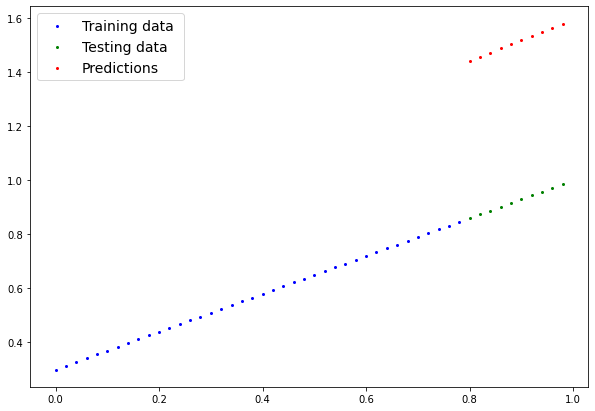

In [ ]:
plot_predictions(predictions = y_preds_1)

In [ ]:
#set model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

###6.3 training model

In [ ]:
w,b

(0.7, 0.3)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
#setup loss fn
loss_fn = nn.L1Loss()


#setup optimization 

optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)

loss_fn, optimizer

(L1Loss(), SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [ ]:
#list param
list(model_1.parameters())

[Parameter containing:
 tensor([[0.7645]], device='cuda:0', requires_grad=True), Parameter containing:
 tensor([0.8300], device='cuda:0', requires_grad=True)]

In [ ]:
torch.manual_seed(42)
epochs = 185

#put data on device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

#tracking
epochs_count = []
train_loss_val = []
test_loss_val = []

#training

for epoch in range(epochs):
  model_1.train()

  #forward pass
  y_pred = model_1(X_train)
  
  #cal loss
  loss = loss_fn(y_pred, y_train)

  #opt zero grad
  optimizer.zero_grad()

  #back propa
  loss.backward()

  #opti step
  optimizer.step()

  #testing
  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 20 == 0:
    epochs_count.append(epoch)
    train_loss_val.append(loss)
    test_loss_val.append(test_loss)

    print(f"Epoch: {epoch} | loss: {test_loss} | test loss: {test_loss}")
    print(model_1.state_dict())

Epoch: 0 | loss: 0.5739762187004089 | test loss: 0.5739762187004089
OrderedDict([('linear_layer.weight', tensor([[0.7606]], device='cuda:0')), ('linear_layer.bias', tensor([0.8200], device='cuda:0'))])
Epoch: 20 | loss: 0.30455657839775085 | test loss: 0.30455657839775085
OrderedDict([('linear_layer.weight', tensor([[0.6826]], device='cuda:0')), ('linear_layer.bias', tensor([0.6200], device='cuda:0'))])
Epoch: 40 | loss: 0.03513690456748009 | test loss: 0.03513690456748009
OrderedDict([('linear_layer.weight', tensor([[0.6046]], device='cuda:0')), ('linear_layer.bias', tensor([0.4200], device='cuda:0'))])
Epoch: 60 | loss: 0.045803118497133255 | test loss: 0.045803118497133255
OrderedDict([('linear_layer.weight', tensor([[0.6025]], device='cuda:0')), ('linear_layer.bias', tensor([0.3410], device='cuda:0'))])
Epoch: 80 | loss: 0.02994490973651409 | test loss: 0.02994490973651409
OrderedDict([('linear_layer.weight', tensor([[0.6366]], device='cuda:0')), ('linear_layer.bias', tensor([0.326

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [ ]:
w,b

(0.7, 0.3)

In [ ]:
type(train_loss_val), type(test_loss_val), train_loss_val[:1], test_loss_val[:1]

(list,
 list,
 [tensor(0.5552, device='cuda:0', grad_fn=<MeanBackward0>)],
 [tensor(0.5740, device='cuda:0')])

<function matplotlib.pyplot.legend(*args, **kwargs)>

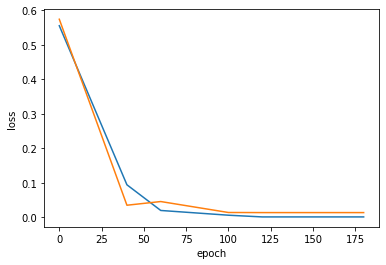

In [ ]:
import numpy as np

plt.plot(epochs_count, np.array(torch.tensor(train_loss_val).numpy()), label="train loss")
plt.plot(epochs_count,  np.array(torch.tensor(test_loss_val).numpy()), label= "test loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend

In [ ]:
w,b

(0.7, 0.3)

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [ ]:
#pred
model_1.eval()
with torch.inference_mode():
  m1_y_preds = model_1(X_test)

m1_y_preds

tensor([[0.8468],
        [0.8607],
        [0.8746],
        [0.8884],
        [0.9023],
        [0.9161],
        [0.9300],
        [0.9438],
        [0.9577],
        [0.9716]], device='cuda:0')

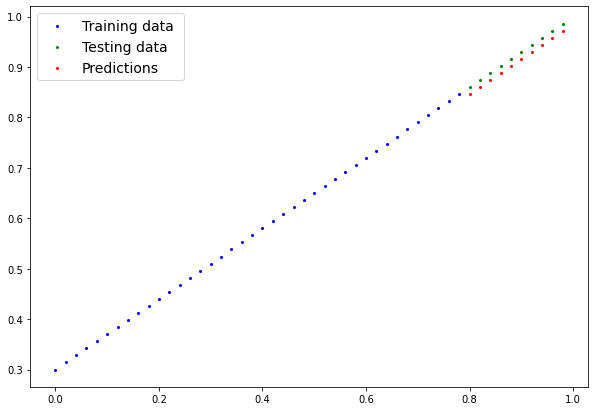

In [ ]:
#check out visually
plot_predictions(predictions= m1_y_preds.cpu())

###6.4 save and load 

In [ ]:
#saving the model
from pathlib import Path 

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "01_mode_1.pth"

MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME 

#save
torch.save(obj = model_1.state_dict(),
           f = MODEL_SAVE_PATH)

In [ ]:
#based 
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.2925], device='cuda:0'))])

In [ ]:
#load

loaded_model_1 = LinearRegressionModelV2()

#before
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[-0.2191]])),
             ('linear_layer.bias', tensor([0.2018]))])

In [ ]:
#after loaded

loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6929]])),
             ('linear_layer.bias', tensor([0.2925]))])